# Central Limit Theorem (CLT)
- The Central Limit Theorem (CLT) is a fundamental concept in statistics that states:

   "If you take sufficiently large random samples from a population (with any distribution), the distribution of the sample means will approximate a normal distribution (bell curve), regardless of the population's original distribution."

# Key Points of CLT:
- Applies to Sample Means:

- The CLT focuses on the distribution of the sample mean (not individual data points).

- Even if the original data is skewed, exponential, or uniform, the sampling distribution of the mean becomes normal as sample size increases.

# Sample Size Matters:

- For most distributions, n ≥ 30 is considered sufficient for the CLT to hold.

- For highly skewed distributions, a larger sample size may be needed.

# Mean & Standard Deviation of Sampling Distribution:

- Mean of sample means (μₓ̄) = Population mean (μ)

- Standard deviation of sample means (σₓ̄) = σ / √n (also called the standard error)

# Why CLT is Important?

- Allows us to use normal distribution-based methods (like z-tests, t-tests, confidence intervals) even when the population distribution is unknown.

 

# Confidence Interval (CI)
-  A confidence interval is a range of values that likely contains the true population parameter (e.g., mean, proportion) with a certain level of confidence.

# Key Components of a Confidence Interval:
- 1.Point Estimate (Sample Statistic):

  e.g., Sample mean (x̄) or sample proportion (p̂).

- 2.Margin of Error (ME):

  Determines the width of the interval.

   ME = Critical value × Standard Error

- 3.For means:

  If σ is known: ME = z × (σ/√n)*

   If σ is unknown: ME = t × (s/√n)* (uses t-distribution)

   For proportions: *ME = z × √(p̂(1-p̂)/n)**

# Confidence Level (e.g., 90%, 95%, 99%):

- The probability that the interval contains the true parameter if we repeated sampling many times.

-  1.Common critical values (z*):

   90% CI → z* ≈ 1.645

   95% CI → z* ≈ 1.96

    99% CI → z* ≈ 2.576


 
# Interpretation of a 95% CI:
- "We are 95% confident that the true population parameter lies within this interval."
  (Note: It does not mean there's a 95% probability that the parameter is in the interval; the parameter is fixed, and the interval varies across samples.)



# Verify Central Limit Theorem and Confidence Interval On titanic Dataset

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test=pd.read_csv("C:\\Users\\dell\\Downloads\\test.csv")
train=pd.read_csv("C:\\Users\\dell\\Downloads\\train.csv")

In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
titanic=pd.concat([test,train])

In [11]:
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN


# Central Limit Theorem

<Axes: ylabel='Density'>

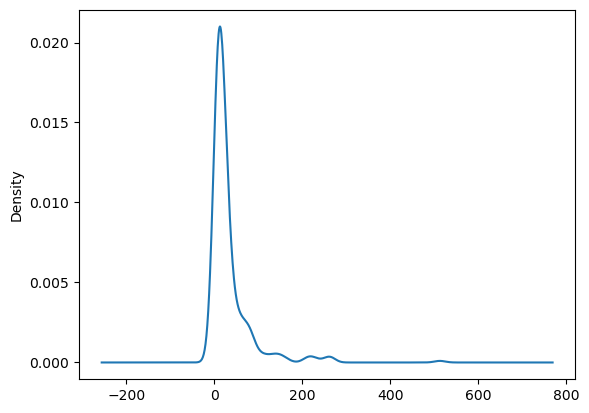

In [13]:
titanic['Fare'].plot(kind='kde')

In [46]:
sample=[]
trial=100
sample_size=50
for i in range(trial):
    sample.append(titanic['Fare'].sample(sample_size).dropna().values.tolist())

In [48]:
sampling_distribution=np.array(sample).mean(axis=1)

In [49]:
sampling_distribution.shape

(100,)

<Axes: ylabel='Density'>

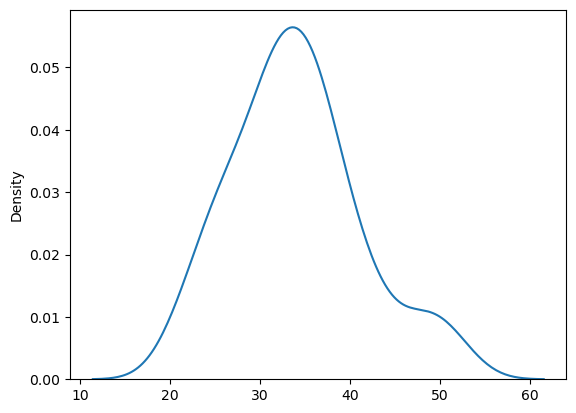

In [50]:
sns.kdeplot(sampling_distribution) #Central Limit Theorem

# Analysis Mean of CLT and Population

In [60]:
mean=sampling_distribution.mean() #Mean of CLT
mean

33.997173620000005

In [66]:
titanic['Fare'].mean() #Mean of Population

33.270043468296414

# Conclusion
- Mean of CTL is equal to Mean of population

# Analyz STD of CLT and Population

In [61]:
std=sampling_distribution.std() #STD of CLT
std

7.175505450674028

In [67]:
titanic['Fare'].std() #STD of Population

51.747062729425394

In [69]:
titanic['Fare'].std()/np.sqrt(sample_size)

7.31813979249247

# Colcusion
- STD of CLT is equal to STD of Population divided by square root of sample size

# Find Upper and Lower Limit for 95% confedence level

In [71]:
lower_limit=mean-1.96*(std/np.sqrt(sample_size))
lower_limit

32.008224983455854

In [72]:
upper_limit=mean+1.96*(std/np.sqrt(sample_size))
upper_limit

35.98612225654416

# Conclusion
- Confedence Interval=[32.0082,35.9861]
- I am 95% sure that the average Fare of titanic is between in above range that i mentioned